In [1]:
import gzip
import os
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mnist(path=None):
    r"""Return (train_images, train_labels, test_images, test_labels).

    Args:
        path (str): Directory containing MNIST. Default is
            /home/USER/data/mnist or C:\Users\USER\data\mnist.
            Create if nonexistant. Download any missing files.

    Returns:
        Tuple of (train_images, train_labels, test_images, test_labels), each
            a matrix. Rows are examples. Columns of images are pixel values.
            Columns of labels are a onehot encoding of the correct class.
    """
    #from https://mattpetersen.github.io/load-mnist-with-numpy
    
    url = 'http://yann.lecun.com/exdb/mnist/'
    files = ['train-images-idx3-ubyte.gz',
             'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz',
             't10k-labels-idx1-ubyte.gz']

    if path is None:
        # Set path to /home/USER/data/mnist or C:\Users\USER\data\mnist
        path = os.path.join(os.path.expanduser('~'), 'data', 'mnist')

    # Create path if it doesn't exist
    os.makedirs(path, exist_ok=True)

    # Download any missing files
    for file in files:
        if file not in os.listdir(path):
            urlretrieve(url + file, os.path.join(path, file))
            print("Downloaded %s to %s" % (file, path))

    def _images(path):
        """Return images loaded locally."""
        with gzip.open(path) as f:
            # First 16 bytes are magic_number, n_imgs, n_rows, n_cols
            pixels = np.frombuffer(f.read(), 'B', offset=16)
        return pixels.reshape(-1, 784).astype('float32') / 255

    def _labels(path):
        """Return labels loaded locally."""
        with gzip.open(path) as f:
            # First 8 bytes are magic_number, n_labels
            integer_labels = np.frombuffer(f.read(), 'B', offset=8)

        def _onehot(integer_labels):
            """Return matrix whose rows are onehot encodings of integers."""
            n_rows = len(integer_labels)
            n_cols = integer_labels.max() + 1
            onehot = np.zeros((n_rows, n_cols), dtype='uint8')
            onehot[np.arange(n_rows), integer_labels] = 1
            return onehot

        return _onehot(integer_labels)

    train_images = _images(os.path.join(path, files[0]))
    train_labels = _labels(os.path.join(path, files[1]))
    test_images = _images(os.path.join(path, files[2]))
    test_labels = _labels(os.path.join(path, files[3]))

    return train_images, train_labels, test_images, test_labels

In [7]:
def plot_by_number_2D(images, labels):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0,1,2,3,4,5,6,7,8,9,10]
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
              'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
              'tab:olive', 'tab:cyan']
    for target, color in zip(targets,colors):
        elements = images[np.where(labels == target)]
        ax.scatter(elements[:, 0]
                   , elements[:, 1]
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [3]:
train_images, train_labels, test_images, test_labels = mnist("datasets/MNIST")

In [4]:
def from_one_hot_to_vector(labels):
    return np.argmax(labels, axis=1)

In [5]:
train_images_s = train_images[:1000]
train_labels_s = train_labels[:1000]
train_labels_v = from_one_hot_to_vector(train_labels_s)

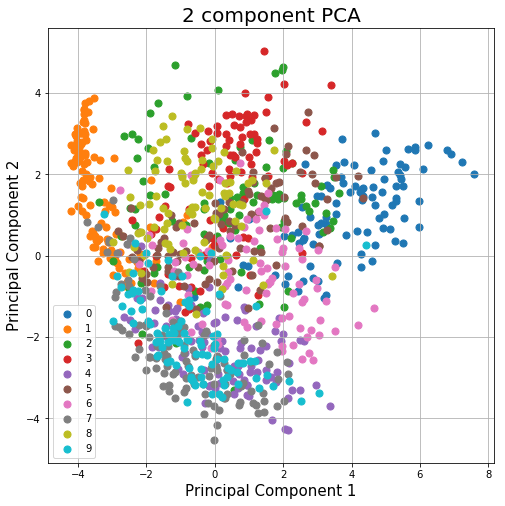

In [123]:
pca = PCA(n_components=2).fit(train_images_s)
pca_train_im = pca.transform(train_images_s)
plot_by_number_2D(pca_train_im, train_labels_v)

In [125]:
def PCA_(data, dims_rescaled_data=2):
    """
    returns: data transformed in 2 dims/columns + regenerated original data
    pass in: data as 2D NumPy array
    """
    import numpy as NP
    from scipy import linalg as LA
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = NP.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # sort eigenvalue in decreasing order
    idx = NP.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return NP.dot(evecs.T, data.T).T, evals, evecs

In [133]:
reconstructed, evals, evecs = PCA_(train_images_s)

In [141]:
(evals[0]+evals[1])/np.sum(evals)

0.17687607758641025

In [150]:
evals[:2]

array([5.12884781, 4.00517279])

In [142]:
pca.explained_variance_

array([5.1288486, 4.005172 ], dtype=float32)

In [144]:
evals[:2]

array([5.12884781, 4.00517279])

In [146]:
pca.explained_variance_ratio_.cumsum()

array([0.09931776, 0.17687604], dtype=float32)

In [152]:
def PCA(X, n_components):
    # normalize to zero mean
    mu = X.mean(axis=0)
    X = X - mu
    
    # eigenvectors of covariance matrix
    sigma = (1/X.T @ X
    eigvals, eigvecs = np.linalg.eig(sigma)
    
    # principal components
    order = np.argsort(eigvals)[::-1]
    components = eigvecs[:, order[:n_components]]
    
    # projection
    Z = X @ components
    
    # result
    return Z, components, eigvals

In [155]:
Z, com, order = PCA(train_images_s, 2)
order[:2]

array([5123.7188, 4001.1675], dtype=float32)

In [149]:
reconstructed

array([[ 0.79653625, -1.3237761 ],
       [ 4.33401487, -1.66941577],
       [ 0.04072615,  1.63690055],
       ...,
       [ 3.01098913, -0.75931982],
       [ 0.58104238, -2.43571474],
       [-0.79666059, -0.65230583]])